<a href="https://colab.research.google.com/github/SofiaLumbik/Coursework/blob/main/%D0%A1%D1%80%D0%B0%D0%B2%D0%BD%D0%B5%D0%BD%D0%B8%D0%B5_NLTK_%D0%B8_SpaCy_(rus).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!python -m spacy download ru_core_news_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 41.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ru_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import nltk
import spacy
import time
import string
import matplotlib.pyplot as plt

In [ ]:
# Загрузка моделей и ресурсов
nltk.download('punkt')
nltk.download('stopwords')
spacy_nlp = spacy.load("ru_core_news_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Тестовый текст на русском
text = "Один раз я пошёл в лес. Вот. Короче, иду там такой один и смотрю на мир. Как бы там всё красиво. Вот. Я такой вижу птичку, а она такая чирикает. Ну, поёт. Ну и потом улетела. Короче, иду я такой дальше. Вижу вдали медвежонка. Вот. Испугался я его и убежал. То есть удрал. Вот так. Приехал домой, а там, короче, меня мама ждёт уже. Я поел и лёг спать и долго как бы потом вспоминал мое путешествие."

In [ ]:
# Удаление знаков препинания
text_no_punct = text.translate(str.maketrans('', '', string.punctuation))
print (text_no_punct)

Один раз я пошёл в лес Вот Короче иду там такой один и смотрю на мир Как бы там всё красиво Вот Я такой вижу птичку а она такая чирикает Ну поёт Ну и потом улетела Короче иду я такой дальше Вижу вдали медвежонка Вот Испугался я его и убежал То есть удрал Вот так Приехал домой а там короче меня мама ждёт уже Я поел и лёг спать и долго как бы потом вспоминал мое путешествие


In [ ]:
# Измерение времени выполнения токенизации
print("Время выполнения:")
start_time = time.time()
nltk_tokens = nltk.word_tokenize(text_no_punct)
nltk_time = time.time() - start_time
print(f"NLTK: {nltk_time:.6f} секунд")

start_time = time.time()
spacy_doc = spacy_nlp(text_no_punct)
spacy_tokens = [token.text for token in spacy_doc]
spacy_time = time.time() - start_time
print(f"spaCy: {spacy_time:.6f} секунд")

Время выполнения:
NLTK: 0.000938 секунд
spaCy: 0.058884 секунд


In [ ]:
# Сравнение токенизации
print("\nТокенизация:")
print("NLTK:", nltk_tokens)
print("spaCy:", spacy_tokens)


Токенизация:
NLTK: ['Один', 'раз', 'я', 'пошёл', 'в', 'лес', 'Вот', 'Короче', 'иду', 'там', 'такой', 'один', 'и', 'смотрю', 'на', 'мир', 'Как', 'бы', 'там', 'всё', 'красиво', 'Вот', 'Я', 'такой', 'вижу', 'птичку', 'а', 'она', 'такая', 'чирикает', 'Ну', 'поёт', 'Ну', 'и', 'потом', 'улетела', 'Короче', 'иду', 'я', 'такой', 'дальше', 'Вижу', 'вдали', 'медвежонка', 'Вот', 'Испугался', 'я', 'его', 'и', 'убежал', 'То', 'есть', 'удрал', 'Вот', 'так', 'Приехал', 'домой', 'а', 'там', 'короче', 'меня', 'мама', 'ждёт', 'уже', 'Я', 'поел', 'и', 'лёг', 'спать', 'и', 'долго', 'как', 'бы', 'потом', 'вспоминал', 'мое', 'путешествие']
spaCy: ['Один', 'раз', 'я', 'пошёл', 'в', 'лес', 'Вот', 'Короче', 'иду', 'там', 'такой', 'один', 'и', 'смотрю', 'на', 'мир', 'Как', 'бы', 'там', 'всё', 'красиво', 'Вот', 'Я', 'такой', 'вижу', 'птичку', 'а', 'она', 'такая', 'чирикает', 'Ну', 'поёт', 'Ну', 'и', 'потом', 'улетела', 'Короче', 'иду', 'я', 'такой', 'дальше', 'Вижу', 'вдали', 'медвежонка', 'Вот', 'Испугался', '

In [ ]:
# Стоп-слова
stop_words_nltk = set(nltk.corpus.stopwords.words('russian'))
stop_words_spacy = spacy_nlp.Defaults.stop_words

In [ ]:
# Измерение времени удаления слов-паразитов
print("Время выполнения:")
start_time = time.time()
nltk_tokens = nltk.word_tokenize(text_no_punct)
nltk_filtered = [word for word in nltk_tokens if word.lower() not in stop_words_nltk]
nltk_time = time.time() - start_time
print(f"NLTK: {nltk_time:.6f} секунд")

start_time = time.time()
spacy_doc = spacy_nlp(text_no_punct)
spacy_filtered = [token.text for token in spacy_doc if not token.is_stop]
spacy_time = time.time() - start_time
print(f"spaCy: {spacy_time:.6f} секунд")

Время выполнения:
NLTK: 0.000580 секунд
spaCy: 0.045861 секунд


In [ ]:
# Сравнение результатов удаления стоп-слов
print("\nУдаление стоп-слов:")
print("NLTK:", nltk_filtered)
print("spaCy:", spacy_filtered)


Удаление стоп-слов:
NLTK: ['пошёл', 'лес', 'Короче', 'иду', 'смотрю', 'мир', 'всё', 'красиво', 'вижу', 'птичку', 'такая', 'чирикает', 'поёт', 'улетела', 'Короче', 'иду', 'дальше', 'Вижу', 'вдали', 'медвежонка', 'Испугался', 'убежал', 'удрал', 'Приехал', 'домой', 'короче', 'мама', 'ждёт', 'поел', 'лёг', 'спать', 'долго', 'вспоминал', 'мое', 'путешествие']
spaCy: ['раз', 'пошёл', 'лес', 'иду', 'смотрю', 'мир', 'красиво', 'вижу', 'птичку', 'чирикает', 'поёт', 'улетела', 'иду', 'Вижу', 'медвежонка', 'Испугался', 'убежал', 'удрал', 'Приехал', 'домой', 'мама', 'ждёт', 'поел', 'лёг', 'спать', 'вспоминал', 'путешествие']


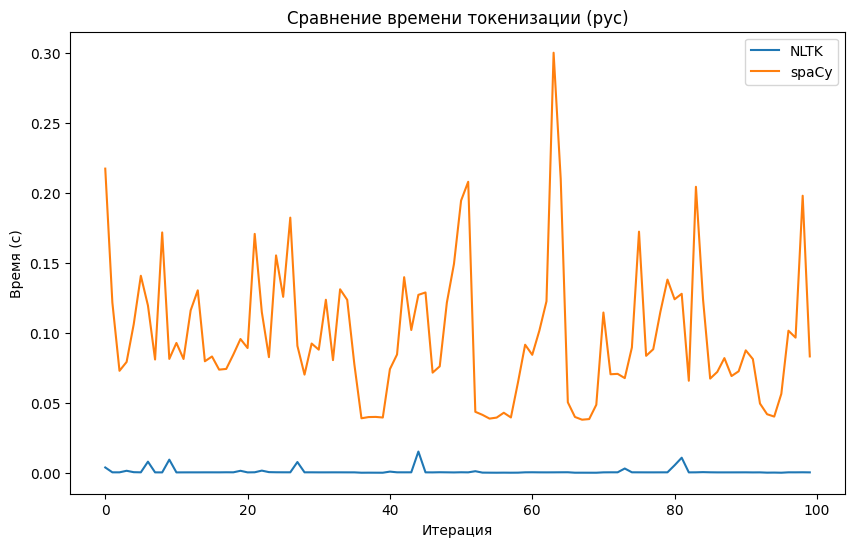

In [ ]:
# Измерение времени токенизации
nltk_times = []
spacy_times = []

for i in range(100):
    start_time = time.time()
    nltk_tokens = nltk.word_tokenize(text_no_punct)
    nltk_time = time.time() - start_time
    nltk_times.append(nltk_time)

    start_time = time.time()
    spacy_doc = spacy_nlp(text_no_punct)
    spacy_tokens = [token.text for token in spacy_doc]
    spacy_time = time.time() - start_time
    spacy_times.append(spacy_time)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(nltk_times, label='NLTK')
plt.plot(spacy_times, label='spaCy')
plt.xlabel('Итерация')
plt.ylabel('Время (с)')
plt.title('Сравнение времени токенизации (рус)')
plt.legend()
plt.show()

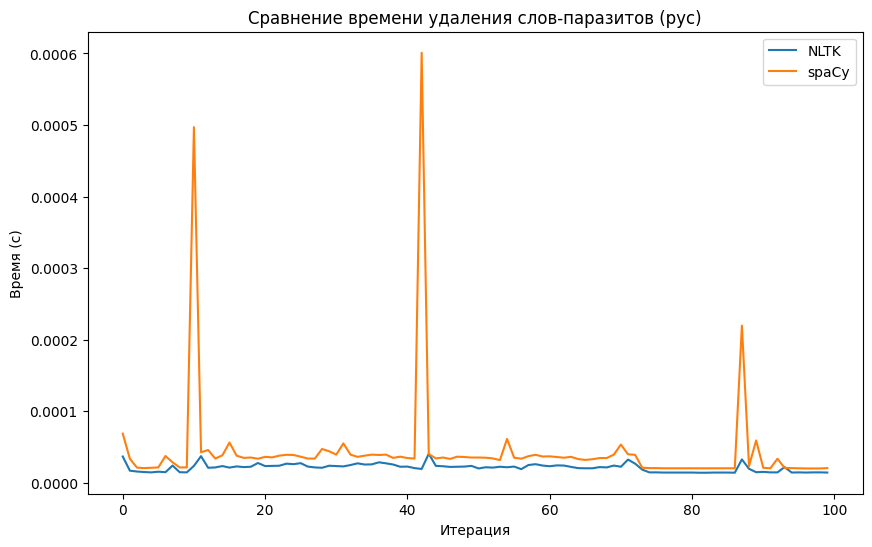

In [ ]:
# Измерение времени удаления стоп-слов
nltk_times = []
spacy_times = []

for i in range(100):
    start_time = time.time()
    nltk_filtered = [word for word in nltk_tokens if word.lower() not in stop_words_nltk]
    nltk_time = time.time() - start_time
    nltk_times.append(nltk_time)

    start_time = time.time()
    spacy_filtered = [token.text for token in spacy_doc if not token.is_stop]
    spacy_time = time.time() - start_time
    spacy_times.append(spacy_time)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(nltk_times, label='NLTK')
plt.plot(spacy_times, label='spaCy')
plt.xlabel('Итерация')
plt.ylabel('Время (с)')
plt.title('Сравнение времени удаления слов-паразитов (рус)')
plt.legend()
plt.show()